In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Downloads/MyLA311_Service_Request_Data_2018.csv')
df.head(10)

In [3]:
df.dropna(inplace=True)

In [7]:
#example NC = 113

In [36]:
df1=df.loc[df['NC']==113]
df2=df.loc[df['NC']==34]
df3=df.loc[df['NC']==90]


In [37]:
df1.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,MobileOS,Anonymous,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1262691971,12/31/2018 11:55:30 PM,01/02/2019 10:20:06 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.2473989385, -118.536249101)",500.0,J,5.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
151,1-1262666561,12/31/2018 05:48:14 PM,01/02/2019 09:59:14 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.2354783103, -118.540498399)",500.0,H,7.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
380,1-1262623621,12/31/2018 03:51:38 PM,01/07/2019 02:44:16 PM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2704697425, -118.550067538)",500.0,G,2.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
405,1-1262616711,12/31/2018 03:43:00 PM,01/07/2019 03:05:27 PM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2502750893, -118.542039847)",500.0,H,5.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
411,1-1262614911,12/31/2018 03:41:28 PM,01/07/2019 02:06:02 PM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2502750893, -118.542039847)",500.0,H,5.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE


In [38]:
final_df=pd.concat([df1,df2,df3])

Text(0.5, 0, 'Neighborhood council code')

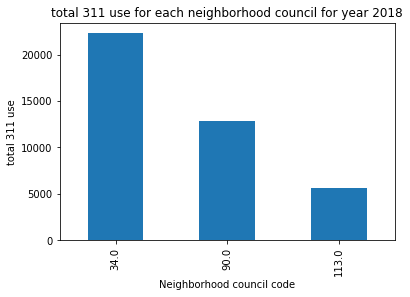

In [39]:
Total_Request_by_NC = final_df.groupby('NC')['RequestType'].count()
Total_Request_by_NC.plot(kind='bar')
plt.title('total 311 use for each neighborhood council for year 2018')
plt.ylabel('total 311 use')
plt.xlabel('Neighborhood council code')

In [69]:
RequestType_by_NC = final_df.groupby(['NC','RequestType']).count()

In [70]:
RequestType_by_NC.head()

SRNumber  CreatedDate  UpdatedDate  ActionTaken  \
NC   RequestType                                                            
34.0 Bulky Items              8142         8142         8142         8142   
     Dead Animal Removal       140          140          140          140   
     Electronic Waste          476          476          476          476   
     Feedback                    4            4            4            4   
     Graffiti Removal        10340        10340        10340        10340   

                          Owner  Status  RequestSource  MobileOS  Anonymous  \
NC   RequestType                                                              
34.0 Bulky Items           8142    8142           8142      2620       8142   
     Dead Animal Removal    140     140            140        30        140   
     Electronic Waste       476     476            476       146        476   
     Feedback                 4       4              4         4          4   
     Graffiti Removal     10340   10340          10340      1985      10340   

                          AssignTo  ...  Longitude  Location  TBMPage  \
NC   RequestType                    ...                                 
34.0 Bulky Items              8142  ...       8142      8142     8142   
     Dead Animal Removal       140  ...        140       140      140   
     Electronic Waste          476  ...        476       476      476   
     Feedback                    1  ...          4         4        4   
     Graffiti Removal        10340  ...       9180      9180    10340   

                          TBMColumn  TBMRow    APC     CD  CDMember  NCName  \
NC   RequestType                                                              
34.0 Bulky Items               8142    8142   8142   8142      8142    8142   
     Dead Animal Removal        140     140    140    140       140     140   
     Electronic Waste           476     476    476    476       476     476   
     Feedback                     4       4      4      4         4       4   
     Graffiti Removal         10340   10340  10340  10340      4104   10340   

                          PolicePrecinct  
NC   RequestType                          
34.0 Bulky Items                    8142  
     Dead Animal Removal             140  
     Electronic Waste                476  
     Feedback                          4  
     Graffiti Removal              10340  

[5 rows x 31 columns]

In [71]:
RequestType_by_NC = pd.DataFrame(final_df.groupby(['NC','RequestType']).count()).reset_index()

In [72]:
RequestType_by_NC_final = RequestType_by_NC.iloc[:, :3]

In [73]:
RequestType_by_NC_final.head()

,NC,RequestType,SRNumber
0,34.0,Bulky Items,8142
1,34.0,Dead Animal Removal,140
2,34.0,Electronic Waste,476
3,34.0,Feedback,4
4,34.0,Graffiti Removal,10340


In [82]:
RequestType_by_NC_final=RequestType_by_NC_final.rename(columns={'SRNumber':'Count'})
RequestType_by_NC_final

,NC,RequestType,Count
0,34.0,Bulky Items,8142
1,34.0,Dead Animal Removal,140
2,34.0,Electronic Waste,476
3,34.0,Feedback,4
4,34.0,Graffiti Removal,10340
5,34.0,Homeless Encampment,828
6,34.0,Illegal Dumping Pickup,1378
7,34.0,Metal/Household Appliances,766
8,34.0,Multiple Streetlight Issue,20
9,34.0,Other,114


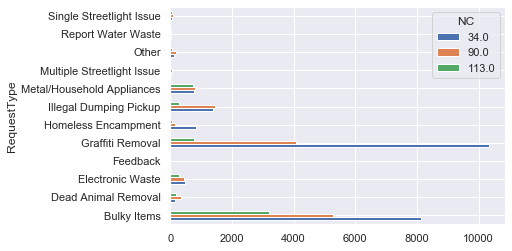

In [96]:
final_df.groupby('NC').RequestType.value_counts().unstack(0).plot.barh()

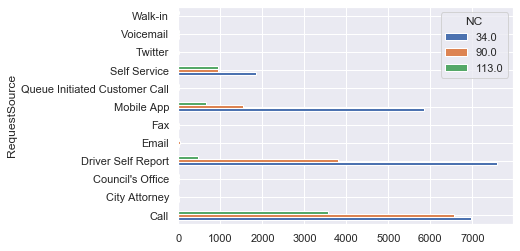

In [97]:
final_df.groupby('NC').RequestSource.value_counts().unstack(0).plot.barh()

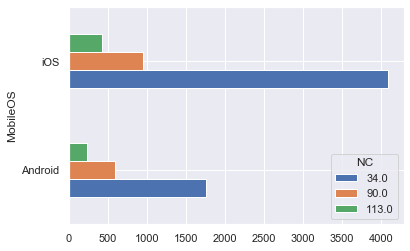

In [98]:
final_df.groupby('NC').MobileOS.value_counts().unstack(0).plot.barh()

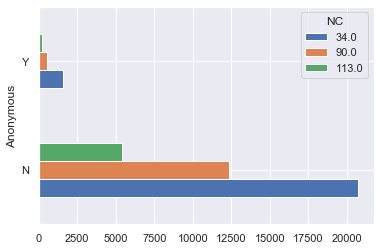

In [99]:
final_df.groupby('NC').Anonymous.value_counts().unstack(0).plot.barh()